# 1.7 Network graph visualization

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [3]:
# Import relationship data

relationship_df = pd.read_csv('country_relationship.csv', index_col = 0)

In [4]:
relationship_df

,source,target,value
0,France,Russia,6
1,Italy,Russia,6
2,Italy,Romania,6
3,Germany,Romania,6
4,Austria,Germany,6
5,Austria,Hungary,6
6,Bulgaria,Hungary,6
7,Bulgaria,Germany,5
8,Germany,Italy,14
9,Germany,Spain,6


In [5]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

#### Graph visualization - Networkx

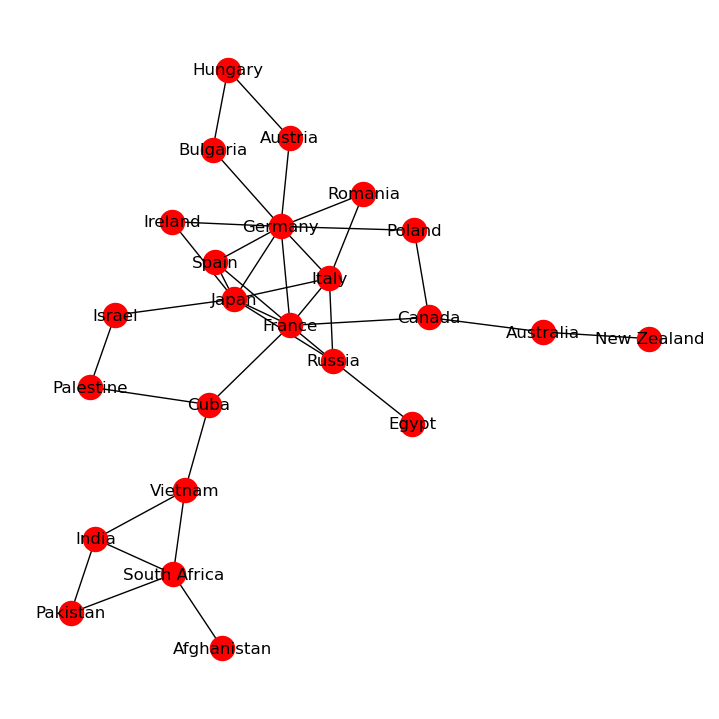

In [7]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [8]:
h.savefig('networkx_plt_country.png')

#### Graph visualization - Pyvis

In [10]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("country.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### Community detection - Leiden algorithm

In [12]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'infomap', 'wurlitzer', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [13]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [14]:
new_com = coms.to_node_community_map()

In [15]:
new_com

defaultdict(list,
            {'France': [0],
             'Russia': [0],
             'Italy': [0],
             'Romania': [0],
             'Germany': [0],
             'Spain': [0],
             'Japan': [0],
             'Ireland': [0],
             'Egypt': [0],
             'Vietnam': [1],
             'South Africa': [1],
             'India': [1],
             'Pakistan': [1],
             'Afghanistan': [1],
             'Poland': [2],
             'Canada': [2],
             'Australia': [2],
             'New Zealand': [2],
             'Austria': [3],
             'Hungary': [3],
             'Bulgaria': [3],
             'Cuba': [4],
             'Israel': [4],
             'Palestine': [4]})

In [16]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [17]:
dict_com

{'France': 0,
 'Russia': 0,
 'Italy': 0,
 'Romania': 0,
 'Germany': 0,
 'Spain': 0,
 'Japan': 0,
 'Ireland': 0,
 'Egypt': 0,
 'Vietnam': 1,
 'South Africa': 1,
 'India': 1,
 'Pakistan': 1,
 'Afghanistan': 1,
 'Poland': 2,
 'Canada': 2,
 'Australia': 2,
 'New Zealand': 2,
 'Austria': 3,
 'Hungary': 3,
 'Bulgaria': 3,
 'Cuba': 4,
 'Israel': 4,
 'Palestine': 4}

In [18]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("country_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


The thick red line between Vietnam and Cuba because they were both Communists.
The thick blue line between Germany and Italy and Germany and Japan because they were allies in WWII
The different colors represent the different time periods that the countries were influential. Green represents the Central Powers in WWI. 
Blue represents the period after Hitler came to power and WWII. Purple represents the decolonization period after WWII when major nations involved in WWII began releasing their overseas colonies. Red represents the period of the Cold War (1947 - 1991), and the rise of communism.

### The most influential countries in the Wiki article "Key Events of 20th Century"

In [20]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.30434782608695654,
 'Russia': 0.17391304347826086,
 'Italy': 0.21739130434782608,
 'Romania': 0.08695652173913043,
 'Germany': 0.3913043478260869,
 'Austria': 0.08695652173913043,
 'Hungary': 0.08695652173913043,
 'Bulgaria': 0.08695652173913043,
 'Spain': 0.13043478260869565,
 'Japan': 0.30434782608695654,
 'Poland': 0.08695652173913043,
 'Canada': 0.13043478260869565,
 'Cuba': 0.13043478260869565,
 'Vietnam': 0.13043478260869565,
 'South Africa': 0.17391304347826086,
 'India': 0.13043478260869565,
 'Ireland': 0.08695652173913043,
 'Egypt': 0.043478260869565216,
 'Israel': 0.08695652173913043,
 'Palestine': 0.08695652173913043,
 'Pakistan': 0.08695652173913043,
 'Afghanistan': 0.043478260869565216,
 'Australia': 0.08695652173913043,
 'New Zealand': 0.043478260869565216}

In [21]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [22]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

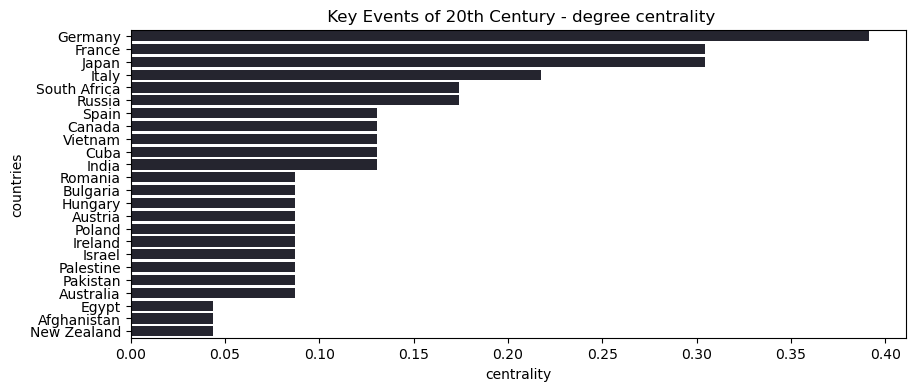

In [23]:
# Plot the degree centrality

plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title(" Key Events of 20th Century - degree centrality")

#### Degree Centrality - Germany had the most connections to other countries in the key events of the 20th century. France and Japan have the second most connections to other countries.
#### Egypt, Afghanistan and New Zealand have the least connections.

In [24]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [25]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

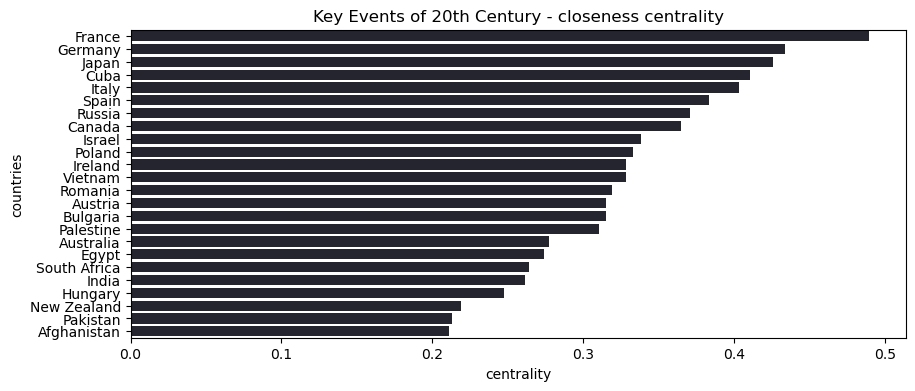

In [26]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("Key Events of 20th Century - closeness centrality")

#### Closeness centrality - All the countries rank moderately high on the closeness scale. 

In [27]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [28]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

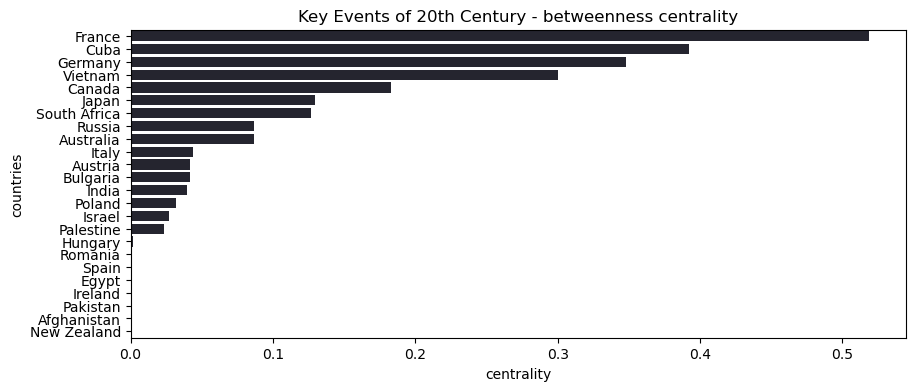

In [29]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("Key Events of 20th Century - betweenness centrality")

#### Betweenness centrality - 16 countries played a key role in the major events of the 20th century. 9 of the 16 countries have a centrality of 0.1.

In [30]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')